# Peakiness

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import bsl.spectral
import scipy.signal

## Load the data

In [13]:
case = 'c0082'
sac = False

if sac:
    data_path = Path(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/spectrograms/{case}/sac_averaged')
    Pxx_scaled = np.load(data_path.joinpath('sac_spectro_filtered_scaled.npy'))
    freqs = np.load(data_path.joinpath('freqs.npy'))
    bins = np.load(data_path.joinpath('bins.npy'))
else:
    #data_path = Path(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/spectrograms/{case}')
    data_path = Path(f'/home/lucas/Documents/BSL-sonification/data/aneurisk/chromagrams/{case}/full_model')
    Pxx_unscaled = np.load(data_path.joinpath(f'unfilt_spectro.npy'))
    Pxx_scaled = bsl.spectral.spectrogram_scaling(Pxx_unscaled,lower_thresh=-20)
    freqs = np.load(data_path.joinpath(f'freqs.npy'))
    bins = np.load(data_path.joinpath(f'bins.npy'))

Text(0.5, 1.0, 'Case c0082 spectrogram')

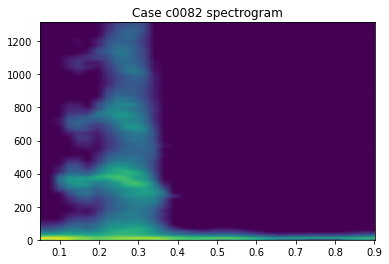

In [14]:
plt.pcolormesh(bins,freqs,Pxx_scaled,shading='gouraud')
plt.title(f'Case {case} spectrogram')

Text(0.5, 1.0, 'Sample column: 6')

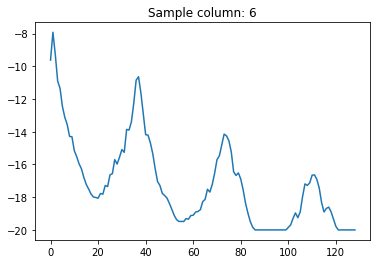

In [23]:
sample_column_id = 6
spectra_column = Pxx_scaled[:,sample_column_id]
plt.plot(spectra_column)
plt.title(f'Sample column: {sample_column_id}')

## Smooth column and get length

In [24]:
def arc_length(x, y):
    """
    SOURCE: https://scicomp.stackexchange.com/questions/19384/calculate-contour-line-length
    """
    npts = len(x)
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    for k in range(1, npts):
        arc = arc + np.sqrt((x[k] - x[k-1])**2 + (y[k] - y[k-1])**2)

    return arc

In [25]:
smoothed_column = scipy.signal.savgol_filter(spectra_column,31,3)

spectra_length = arc_length(bins,spectra_column)
smoothed_length = arc_length(bins,smoothed_column) 

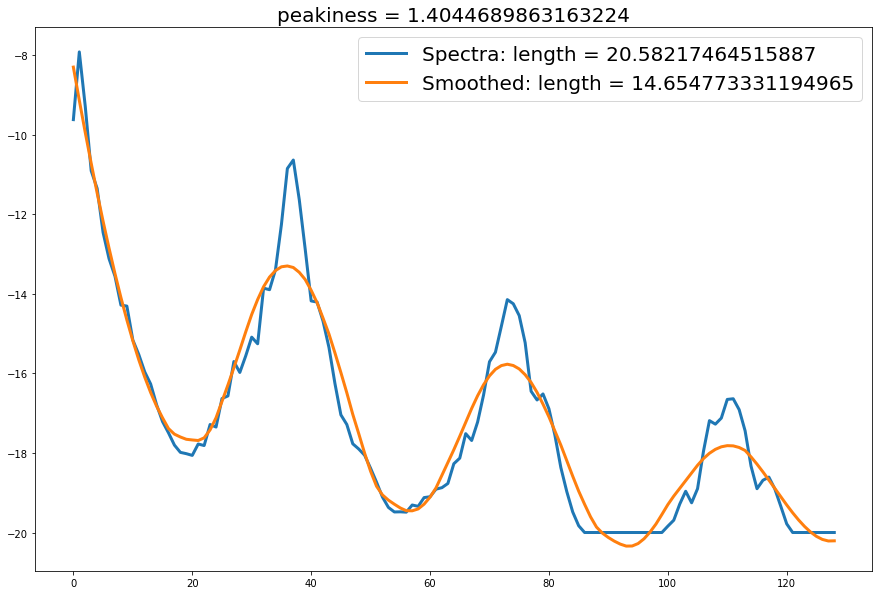

In [26]:
plt.figure(figsize=(15,10))
plt.plot(spectra_column,label=f'Spectra: length = {spectra_length}',linewidth=3)
plt.plot(smoothed_column,label = f'Smoothed: length = {smoothed_length}',linewidth=3)
plt.title(f'peakiness = {spectra_length/smoothed_length}',fontsize=20)
plt.legend(fontsize=20)


## Apply over entire spectrogram

In [27]:
foo = np.array([[1,2,3,4],
                [4,5,6,7],
                [7,8,9,9]])

In [28]:
np.apply_along_axis(np.mean,0,foo)

array([4.        , 5.        , 6.        , 6.66666667])

In [29]:
def column_peakiness(spectra_column,bins):
    smoothed_column = scipy.signal.savgol_filter(spectra_column,31,3)
    spectra_length = arc_length(bins,spectra_column)
    smoothed_length = arc_length(bins,smoothed_column)
    return spectra_length/smoothed_length

In [30]:
peakiness_all_columns = np.apply_along_axis(column_peakiness,0,Pxx_scaled,bins=bins)

Text(0.5, 1.0, 'Spectrogram with 150x scaled peakiness')

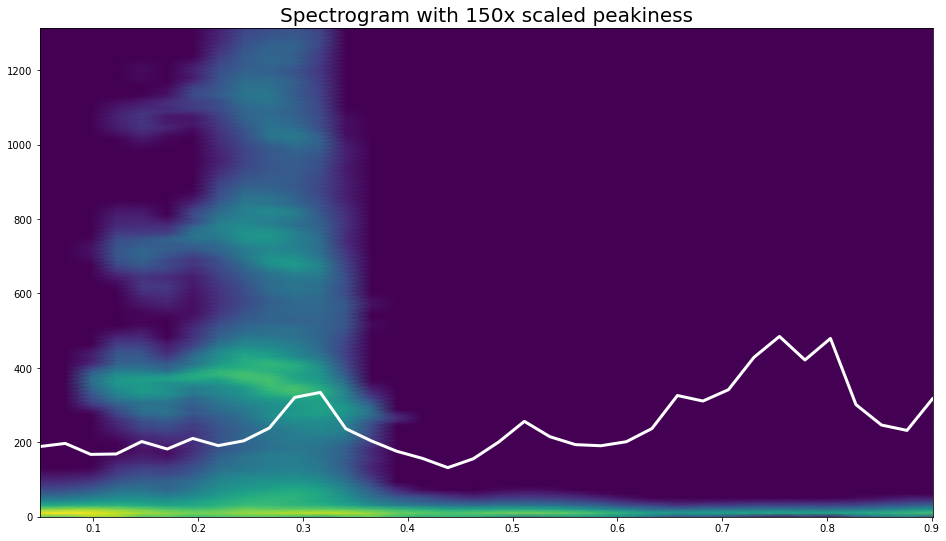

In [31]:
plt.figure(figsize=(16,9))
plt.pcolormesh(bins,freqs,Pxx_scaled,shading='gouraud')
plt.plot(bins,(peakiness_all_columns*150),color='w',linewidth=3)
plt.title(f'Spectrogram with {150}x scaled peakiness',fontsize=20)